# Name:Mohammed Ashraf

# Company:Oasis Infobyte

# Project:EMAIL SPAM DETECTION

In [1]:
#for data preprocessing
import pandas as pd
import numpy as np
#for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#text_preprocessing
import nltk
import string
from nltk.corpus import stopwords
import re
#for tokenization
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
#pos_tagging
from nltk.tag import pos_tag, pos_tag_sents
#chunking
from nltk import ne_chunk
from nltk.chunk import RegexpParser
#n_grams
from sklearn.feature_extraction.text import CountVectorizer
#for the model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#for confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
# Example with specifying encoding
df = pd.read_csv("spam.csv", encoding='latin1')

# Task:
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. 

# Description(after preprocessing):

1-type: This column indicates the type of the email, which could be either spam or legitimate (ham).

2-message: This column likely contains the text of the email messages.

3-label_num: This column represents the labels for the emails, with numerical values. For example, 0 could represent ham (non-spam) and 1 could represent spam.

4-message_len: This column contain the length (number of characters or words) of each email message.

5-cleaning_message: This column involves pre-processing steps where the email messages have been cleaned, which could include removing irrelevant characters, HTML tags, or other noise.

6-tokenize_message: This column involve tokenization, which is the process of breaking down text into individual words or tokens.

7-pos_tagging: Part-of-speech tagging involves assigning parts of speech (such as nouns, verbs, adjectives) to each token in a sentence.

8-chunking: Chunking is a natural language processing task that involves grouping tokens into chunks, which are usually phrases or meaningful combinations of words.

9-named_entity_recognition: This column likely contains information about recognizing named entities in the text, such as names of people, organizations, locations, etc.

10-char_ngrams: Character n-grams involve breaking down the text into sequences of characters of length 'n'. This can be useful for capturing patterns or features at the character level.



In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#rename v1 to type
df.rename(columns={'v1': 'type'}, inplace=True)

In [6]:
#rename v2 to message
df.rename(columns={'v2': 'message'}, inplace=True)

In [7]:
#drop Unnamed: 2 column
df.drop('Unnamed: 2', axis=1, inplace=True)

In [8]:
#drop Unnamed: 3 column
df.drop('Unnamed: 3', axis=1, inplace=True)

In [9]:
#drop Unnamed: 4 column
df.drop('Unnamed: 4', axis=1, inplace=True)

In [10]:
#seeing the data after renaming and dropping 
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# convert type column to a numerical variable and store it in column label_num
df['label_num'] = df['type'].map({'ham':0, 'spam':1})
df.head()

,type,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
#getting the length of each message in data 
df['message_len'] = df.message.apply(len)
df.head()

,type,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [13]:
#Reading first Rows of data  
df.head()

,type,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [14]:
#seeing the last Rows of data 
df.tail()

,type,message,label_num,message_len
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125
5571,ham,Rofl. Its true to its name,0,26


In [15]:
#size of data
df.size

22288

In [16]:
#shape of data
df.shape

(5572, 4)

In [17]:
#exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         5572 non-null   object
 1   message      5572 non-null   object
 2   label_num    5572 non-null   int64 
 3   message_len  5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [18]:
#the description of data
df.describe()

,label_num,message_len
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


In [19]:
#the description of spam
df[df.type=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [20]:
#the description of ham
df[df.type=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [21]:
#seeing the types of the columns
df.dtypes

type           object
message        object
label_num       int64
message_len     int64
dtype: object

In [22]:
#seeing the columns of the data
df.columns

Index(['type', 'message', 'label_num', 'message_len'], dtype='object')

In [23]:
#reading the message that is with length 125
df[df.message_len == 125].message.iloc[0]

'Your free ringtone is waiting to be collected. Simply text the password \\MIX\\" to 85069 to verify. Get Usher and Britney. FML'

In [24]:
#reading data 
df

,type,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


# Data preprocessing

In [25]:
#checking data if have a duplicated values
df.duplicated().sum()

403

In [26]:
df=df.drop_duplicates()

In [27]:
#checking data after removing duplicated values
df.duplicated().sum()

0

In [28]:
#checking data if have null values
#there is no null values in the data 
df.isnull().sum()

type           0
message        0
label_num      0
message_len    0
dtype: int64

# Text preprocessing

In [29]:
#text preprocessing(cleaning)

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d', '', text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)
    
    return text

# Apply the combined function to the 'message' column
df['cleaning_message'] = df['message'].apply(preprocess_text)

# Print the modified DataFrame
print(df)

      type                                            message  label_num  \
0      ham  Go until jurong point, crazy.. Available only ...          0   
1      ham                      Ok lar... Joking wif u oni...          0   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          1   
3      ham  U dun say so early hor... U c already then say...          0   
4      ham  Nah I don't think he goes to usf, he lives aro...          0   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...          1   
5568   ham              Will Ì_ b going to esplanade fr home?          0   
5569   ham  Pity, * was in mood for that. So...any other s...          0   
5570   ham  The guy did some bitching but I acted like i'd...          0   
5571   ham                         Rofl. Its true to its name          0   

      message_len                                   cleaning_message  
0             11

In [30]:
df['cleaning_message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: cleaning_message, Length: 5169, dtype: object

In [31]:
df

,type,message,label_num,message_len,cleaning_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...


In [32]:
#tokenization
def tokenize(text):
    tokenizer = RegexpTokenizer("\s+", gaps=True)
    return tokenizer.tokenize(text)
df['tokenize_message'] = df['cleaning_message'].apply(tokenize)

In [33]:
df['tokenize_message']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: tokenize_message, Length: 5169, dtype: object

In [34]:
df

,type,message,label_num,message_len,cleaning_message,tokenize_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home,"[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions,"[pity, mood, soany, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [35]:
#pos_tagging
def pos_tagging(tokens):
    return pos_tag(tokens)
df['pos_tagging'] = df['tokenize_message'].apply(pos_tagging)

In [36]:
df['pos_tagging']

0       [(go, VB), (jurong, JJ), (point, NN), (crazy, ...
1       [(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...
2       [(free, JJ), (entry, NN), (wkly, VBD), (comp, ...
3       [(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...
4       [(nah, JJ), (dont, NN), (think, NN), (goes, VB...
                              ...                        
5567    [(nd, JJ), (time, NN), (tried, VBN), (contact,...
5568    [(b, NN), (going, VBG), (esplanade, JJ), (fr, ...
5569    [(pity, NN), (mood, NN), (soany, JJ), (suggest...
5570    [(guy, NN), (bitching, VBG), (acted, VBN), (li...
5571                 [(rofl, NN), (true, JJ), (name, NN)]
Name: pos_tagging, Length: 5169, dtype: object

In [37]:
df

,type,message,label_num,message_len,cleaning_message,tokenize_message,pos_tagging
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[(nah, JJ), (dont, NN), (think, NN), (goes, VB..."
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...,"[nd, time, tried, contact, u, u, pound, prize,...","[(nd, JJ), (time, NN), (tried, VBN), (contact,..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home,"[b, going, esplanade, fr, home]","[(b, NN), (going, VBG), (esplanade, JJ), (fr, ..."
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[(pity, NN), (mood, NN), (soany, JJ), (suggest..."
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[(guy, NN), (bitching, VBG), (acted, VBN), (li..."


In [38]:
#chuncking
def chunking(tokens):
    if not tokens:
        return []  # Return an empty list if tokens is empty

    # Define a chunking pattern (here, NP: Noun Phrase)
    chunking_pattern = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(chunking_pattern)
    
    # Perform chunking
    chunks = chunk_parser.parse(pos_tag(tokens))
    
    # Extract the chunked phrases
    return [' '.join([word for word, tag in chunk]) for chunk in chunks if isinstance(chunk, nltk.Tree)]


In [39]:
df['chunking'] = df['tokenize_message'].apply(chunking)

In [40]:
df['chunking']

0       [jurong point, crazy, available bugis, great w...
1                             [ok lar joking, wif, u oni]
2       [free entry, comp, win, final tkts, st, fa rec...
3                                        [early hor, u c]
4                                       [nah dont, think]
                              ...                        
5567    [nd time, contact, u u pound, prize, claim, ea...
5568                              [b, esplanade fr, home]
5569                                         [pity, mood]
5570    [guy, id, interested buying, something, next w...
5571                                    [rofl, true name]
Name: chunking, Length: 5169, dtype: object

In [41]:
df

,type,message,label_num,message_len,cleaning_message,tokenize_message,pos_tagging,chunking
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[jurong point, crazy, available bugis, great w..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[ok lar joking, wif, u oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[free entry, comp, win, final tkts, st, fa rec..."
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...","[early hor, u c]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[(nah, JJ), (dont, NN), (think, NN), (goes, VB...","[nah dont, think]"
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...,"[nd, time, tried, contact, u, u, pound, prize,...","[(nd, JJ), (time, NN), (tried, VBN), (contact,...","[nd time, contact, u u pound, prize, claim, ea..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home,"[b, going, esplanade, fr, home]","[(b, NN), (going, VBG), (esplanade, JJ), (fr, ...","[b, esplanade fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[(pity, NN), (mood, NN), (soany, JJ), (suggest...","[pity, mood]"
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[(guy, NN), (bitching, VBG), (acted, VBN), (li...","[guy, id, interested buying, something, next w..."


In [42]:
#NER
def named_entity_recognition(tokens):
    # Perform Named Entity Recognition (NER)
    return ne_chunk(pos_tag(tokens))

In [43]:
df['named_entity_recognition'] = df['chunking'].apply(named_entity_recognition)

In [44]:
df['named_entity_recognition'] 

0       [(jurong point, NN), (crazy, NN), (available b...
1          [(ok lar joking, VBG), (wif, NN), (u oni, NN)]
2       [(free entry, NN), (comp, NN), (win, VBP), (fi...
3                            [(early hor, NN), (u c, NN)]
4                          [(nah dont, RB), (think, VBP)]
                              ...                        
5567    [(nd time, JJ), (contact, NN), (u u pound, JJ)...
5568            [(b, NN), (esplanade fr, NN), (home, NN)]
5569                             [(pity, NN), (mood, NN)]
5570    [(guy, NN), (id, NN), (interested buying, VBG)...
5571                        [(rofl, NN), (true name, NN)]
Name: named_entity_recognition, Length: 5169, dtype: object

In [45]:
df

,type,message,label_num,message_len,cleaning_message,tokenize_message,pos_tagging,chunking,named_entity_recognition
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[jurong point, crazy, available bugis, great w...","[(jurong point, NN), (crazy, NN), (available b..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[ok lar joking, wif, u oni]","[(ok lar joking, VBG), (wif, NN), (u oni, NN)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[free entry, comp, win, final tkts, st, fa rec...","[(free entry, NN), (comp, NN), (win, VBP), (fi..."
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...","[early hor, u c]","[(early hor, NN), (u c, NN)]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[(nah, JJ), (dont, NN), (think, NN), (goes, VB...","[nah dont, think]","[(nah dont, RB), (think, VBP)]"
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...,"[nd, time, tried, contact, u, u, pound, prize,...","[(nd, JJ), (time, NN), (tried, VBN), (contact,...","[nd time, contact, u u pound, prize, claim, ea...","[(nd time, JJ), (contact, NN), (u u pound, JJ)..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home,"[b, going, esplanade, fr, home]","[(b, NN), (going, VBG), (esplanade, JJ), (fr, ...","[b, esplanade fr, home]","[(b, NN), (esplanade fr, NN), (home, NN)]"
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[(pity, NN), (mood, NN), (soany, JJ), (suggest...","[pity, mood]","[(pity, NN), (mood, NN)]"
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[(guy, NN), (bitching, VBG), (acted, VBN), (li...","[guy, id, interested buying, something, next w...","[(guy, NN), (id, NN), (interested buying, VBG)..."


In [46]:
#n-grams

# Create a CountVectorizer for character n-grams
vectorizer_char_ngrams = CountVectorizer(analyzer='char', ngram_range=(3, 3))  # Adjust ngram_range as needed

# Fit and transform the 'sms_edit_removal_stop_word' column
X_char_ngrams = vectorizer_char_ngrams.fit_transform(df['cleaning_message'])

# Convert the result to a DataFrame for better visualization
char_ngrams_df = pd.DataFrame(X_char_ngrams.toarray(), columns=vectorizer_char_ngrams.get_feature_names_out())

In [47]:
df['char_ngrams'] = char_ngrams_df.values.tolist()

In [48]:
df['char_ngrams']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
5567    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5568    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5569    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5570    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5571    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: char_ngrams, Length: 5169, dtype: object

In [49]:
df

,type,message,label_num,message_len,cleaning_message,tokenize_message,pos_tagging,chunking,named_entity_recognition,char_ngrams
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[jurong point, crazy, available bugis, great w...","[(jurong point, NN), (crazy, NN), (available b...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[ok lar joking, wif, u oni]","[(ok lar joking, VBG), (wif, NN), (u oni, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[free entry, comp, win, final tkts, st, fa rec...","[(free entry, NN), (comp, NN), (win, VBP), (fi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...","[early hor, u c]","[(early hor, NN), (u c, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[(nah, JJ), (dont, NN), (think, NN), (goes, VB...","[nah dont, think]","[(nah dont, RB), (think, VBP)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...,"[nd, time, tried, contact, u, u, pound, prize,...","[(nd, JJ), (time, NN), (tried, VBN), (contact,...","[nd time, contact, u u pound, prize, claim, ea...","[(nd time, JJ), (contact, NN), (u u pound, JJ)...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home,"[b, going, esplanade, fr, home]","[(b, NN), (going, VBG), (esplanade, JJ), (fr, ...","[b, esplanade fr, home]","[(b, NN), (esplanade fr, NN), (home, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[(pity, NN), (mood, NN), (soany, JJ), (suggest...","[pity, mood]","[(pity, NN), (mood, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[(guy, NN), (bitching, VBG), (acted, VBN), (li...","[guy, id, interested buying, something, next w...","[(guy, NN), (id, NN), (interested buying, VBG)...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# let's build the model by using Naive Bayes classifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaning_message'], df['type'], test_size=0.2, random_state=42)

In [51]:
df.columns

Index(['type', 'message', 'label_num', 'message_len', 'cleaning_message',
       'tokenize_message', 'pos_tagging', 'chunking',
       'named_entity_recognition', 'char_ngrams'],
      dtype='object')

In [52]:
# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [53]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

In [54]:
# Make predictions on the test set
y_pred = clf.predict(X_test_vectorized)

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Accuracy and Classification Report

In [56]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.97678916827853
Confusion Matrix:
[[879  10]
 [ 14 131]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       889
        spam       0.93      0.90      0.92       145

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



# Confusion Matrix

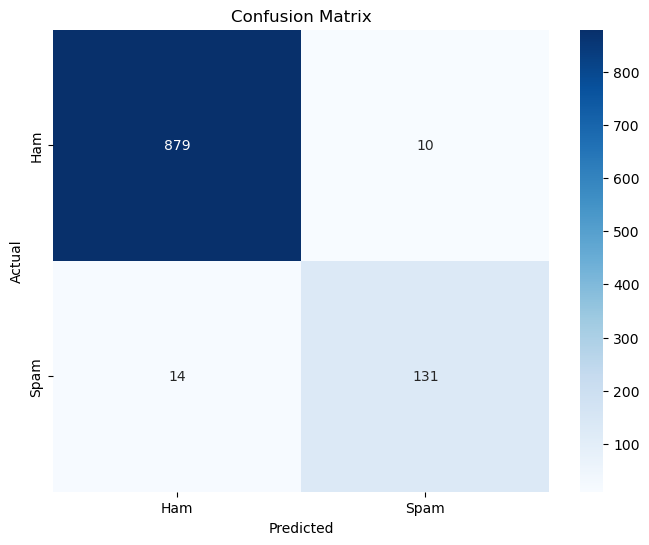

In [57]:
# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# numbers of spam and ham messages

In [58]:
# Extract the numbers of spam and ham messages
tn, fp, fn, tp = conf_matrix.ravel()

# Print the numbers
print(f'Number of Ham (Non-Spam) Messages: {tn + fp}')
print(f'Number of Spam Messages: {fn + tp}')

Number of Ham (Non-Spam) Messages: 889
Number of Spam Messages: 145


# Data visualization 

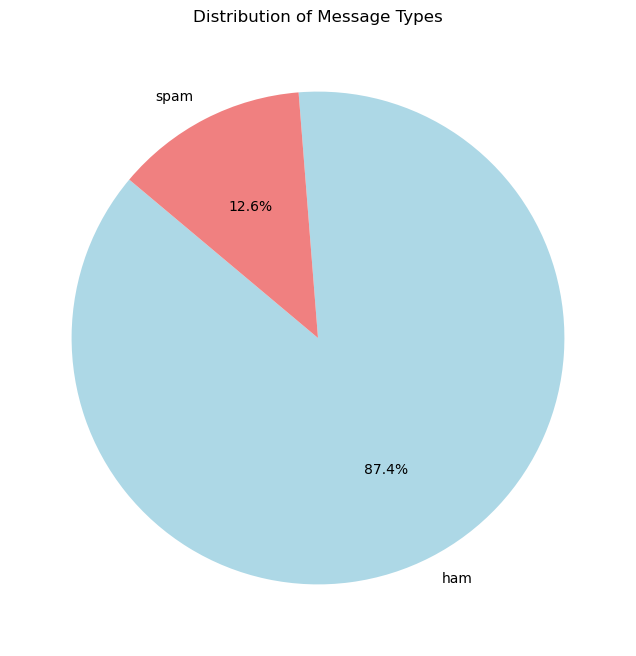

In [59]:
# Plot a pie chart for the distribution of 'Type'
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Message Types')
plt.show()


# let's see the data after text preprocessing (NLP)

In [60]:
df

,type,message,label_num,message_len,cleaning_message,tokenize_message,pos_tagging,chunking,named_entity_recognition,char_ngrams
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[(go, VB), (jurong, JJ), (point, NN), (crazy, ...","[jurong point, crazy, available bugis, great w...","[(jurong point, NN), (crazy, NN), (available b...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...","[ok lar joking, wif, u oni]","[(ok lar joking, VBG), (wif, NN), (u oni, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts st ...,"[free, entry, wkly, comp, win, fa, cup, final,...","[(free, JJ), (entry, NN), (wkly, VBD), (comp, ...","[free entry, comp, win, final tkts, st, fa rec...","[(free entry, NN), (comp, NN), (win, VBP), (fi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]","[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...","[early hor, u c]","[(early hor, NN), (u c, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...","[(nah, JJ), (dont, NN), (think, NN), (goes, VB...","[nah dont, think]","[(nah dont, RB), (think, VBP)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,nd time tried contact u u pound prize claim ea...,"[nd, time, tried, contact, u, u, pound, prize,...","[(nd, JJ), (time, NN), (tried, VBN), (contact,...","[nd time, contact, u u pound, prize, claim, ea...","[(nd time, JJ), (contact, NN), (u u pound, JJ)...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,b going esplanade fr home,"[b, going, esplanade, fr, home]","[(b, NN), (going, VBG), (esplanade, JJ), (fr, ...","[b, esplanade fr, home]","[(b, NN), (esplanade fr, NN), (home, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity mood soany suggestions,"[pity, mood, soany, suggestions]","[(pity, NN), (mood, NN), (soany, JJ), (suggest...","[pity, mood]","[(pity, NN), (mood, NN)]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...","[(guy, NN), (bitching, VBG), (acted, VBN), (li...","[guy, id, interested buying, something, next w...","[(guy, NN), (id, NN), (interested buying, VBG)...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Thanks Oasis infobyte